In [32]:
import matplotlib.pyplot as plt
interval = 10
def plot_message_logs(nums, suffix):
    plt.figure(figsize=(16, 6))
    all_times = []
    all_rates = []
    data_dict = {}

    # 读取所有文件数据
    for num in nums:
        times = []
        rates = []
        with open(f'message.log.{num}.{suffix}', 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 4:
                    continue
                try:
                    t = int(parts[0]) * 5  # 乘以5ms
                    r = float(parts[3])
                    times.append(t)
                    rates.append(r)
                except Exception:
                    continue
            times.append(times[-1] + 5)  # 确保最后一个时间点也被记录
            rates.append(0)  # 确保最后一个速率也被记录
        plt.plot(times, rates, label=f'flow {num}')
        data_dict[num] = (times, rates)
        all_times.append(times)
        all_rates.append(rates)

    # 统一时间轴
    union_times = sorted(set().union(*all_times))
    sum_rates = []
    for t in union_times:
        s = 0
        for i in range(len(nums)):
            # 找到当前文件在该时间点的速率
            if t in all_times[i]:
                idx = all_times[i].index(t)
                s += all_rates[i][idx]
        sum_rates.append(s)
    plt.plot(union_times, sum_rates, label='sum', color='black', linewidth=2, linestyle='--')

    plt.xlabel('time (ms)')
    plt.ylabel('rate (Gbps)')
    plt.title(f'message rate for {suffix}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rate_logs(nums, suffix):
    plt.figure(figsize=(16, 6))
    all_times = []
    all_rates = []
    data_dict = {}
    start_time = 0
    for num in nums:
        times = []
        rates = []
        with open(f'rate.log.{num}.{suffix}', 'r') as f:
            t0 = 0
            for line in f:
                if ':' not in line or 'Gbps' not in line:
                    continue
                try:
                    t, rest = line.strip().split(':', 1)
                    t = int(t)
                    r = float(rest.replace('Gbps', '').strip())
                    if start_time == 0:
                        start_time =  t // interval * interval
                    if t0 == 0:
                        t0 = start_time - (num - 1) * 1000
                        print(t0)
                    # t0 = t
                    times.append(t0)
                    rates.append(r)
                    t0 += interval  # 每50ms一个时间点
                except Exception:
                    continue
            times.insert(0, times[0] - interval)  # 确保第一个时间点为0
            rates.insert(0, 0)  # 确保第一个速率也为0
            times.append(times[-1] + interval)  # 确保最后一个时间点也被记录
            rates.append(0)  # 确保最后一个速率也被记录
        plt.plot(times, rates, label=f'flow {num}')
        data_dict[num] = (times, rates)
        all_times.append(times)
        all_rates.append(rates)

    # 统一时间轴
    union_times = sorted(set().union(*all_times))
    sum_rates = []
    for t in union_times:
        s = 0
        for i in range(len(nums)):
            if t in all_times[i]:
                idx = all_times[i].index(t)
                s += all_rates[i][idx]
        sum_rates.append(s)
    plt.plot(union_times, sum_rates, label='sum', color='black', linewidth=2, linestyle='--')

    plt.xlabel('time (ms)')
    plt.ylabel('rate (Gbps)')
    plt.title(f'rate for {suffix}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [60]:
import matplotlib.pyplot as plt
interval = 10
def plot_message_logs(nums, suffix):
    plt.figure(figsize=(16, 6))
    all_times_1 = []
    all_times_2 = []
    all_rates_1 = []
    all_rates_2 = []
    data_dict = {}

    # 读取所有文件数据
    for num in nums:
        times = []
        rates = []
        with open(f'message.log.{num}.{suffix}', 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 4:
                    continue
                try:
                    t = int(parts[0]) * 5  # 乘以5ms
                    r = float(parts[3])
                    times.append(t)
                    rates.append(r)
                except Exception:
                    continue
            times.append(times[-1] + 5)  # 确保最后一个时间点也被记录
            rates.append(0)  # 确保最后一个速率也被记录
        plt.plot(times, rates, label=f'flow {num}')
        data_dict[num] = (times, rates)
        if num == 1 or num == 2:
            all_times_1.append(times)
            all_rates_1.append(rates)
        if num == 3 or num == 2:
            all_times_2.append(times)
            all_rates_2.append(rates)

    # 统一时间轴
    union_times_1 = sorted(set().union(*all_times_1))
    union_times_2 = sorted(set().union(*all_times_2))
    sum_rates_1 = []
    sum_rates_2 = []
    for t in union_times_1:
        s = 0
        for i in range(len(all_times_1)):
            # 找到当前文件在该时间点的速率
            if t in all_times_1[i]:
                idx = all_times_1[i].index(t)
                s += all_rates_1[i][idx]
        sum_rates_1.append(s)
    plt.plot(union_times_1, sum_rates_1, label='sum of 1/2', color='black', linewidth=2, linestyle='--')
        
    for t in union_times_2:
        s = 0
        for i in range(len(all_times_2)):
            # 找到当前文件在该时间点的速率
            if t in all_times_2[i]:
                idx = all_times_2[i].index(t)
                s += all_rates_2[i][idx]
        sum_rates_2.append(s)
    plt.plot(union_times_2, sum_rates_2, label='sum of 2/3', color='red', linewidth=2, linestyle='dashed')

    plt.xlabel('time (ms)')
    plt.ylabel('rate (Gbps)')
    plt.title(f'message rate for {suffix}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rate_logs(nums, suffix):
    plt.figure(figsize=(16, 6))
    all_times_1 = []
    all_times_2 = []
    all_rates_1 = []
    all_rates_2 = []
    data_dict = {}

    for num in nums:
        times = []
        rates = []
        with open(f'rate.log.{num}.{suffix}', 'r') as f:
            t0 = 0
            for line in f:
                if ':' not in line or 'Gbps' not in line:
                    continue
                try:
                    t, rest = line.strip().split(':', 1)
                    t = int(t)
                    r = float(rest.replace('Gbps', '').strip())
                    if(t0 == 0):
                        t0 = t // interval * interval
                    times.append(t0)
                    rates.append(r)
                    t0 += interval  # 每50ms一个时间点
                except Exception:
                    continue
            times.insert(0, times[0] - interval)  # 确保第一个时间点为0
            rates.insert(0, 0)  # 确保第一个速率也为0
            times.append(times[-1] + interval)  # 确保最后一个时间点也被记录
            rates.append(0)  # 确保最后一个速率也被记录
        plt.plot(times, rates, label=f'flow {num}')
        data_dict[num] = (times, rates)
        if num == 1 or num == 2:
            all_times_1.append(times)
            all_rates_1.append(rates)
        if num == 3 or num == 2:
            all_times_2.append(times)
            all_rates_2.append(rates)

    # 统一时间轴
    union_times_1 = sorted(set().union(*all_times_1))
    union_times_2 = sorted(set().union(*all_times_2))
    sum_rates_1 = []
    sum_rates_2 = []
    for t in union_times_1:
        s = 0
        for i in range(len(all_times_1)):
            # 找到当前文件在该时间点的速率
            if t in all_times_1[i]:
                idx = all_times_1[i].index(t)
                s += all_rates_1[i][idx]
        sum_rates_1.append(s)
    plt.plot(union_times_1, sum_rates_1, label='sum of 1/2', color='black', linewidth=2, linestyle='--')
    
    
    for t in union_times_2:
        s = 0
        for i in range(len(all_times_2)):
            # 找到当前文件在该时间点的速率
            if t in all_times_2[i]:
                idx = all_times_2[i].index(t)
                s += all_rates_2[i][idx]
        sum_rates_2.append(s)
    plt.plot(union_times_2, sum_rates_2, label='sum of 2/3', color='red', linewidth=2, linestyle='dashed')

    plt.xlabel('time (ms)')
    plt.ylabel('rate (Gbps)')
    plt.title(f'rate for {suffix}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


1754179295580
1754179294580
1754179293580


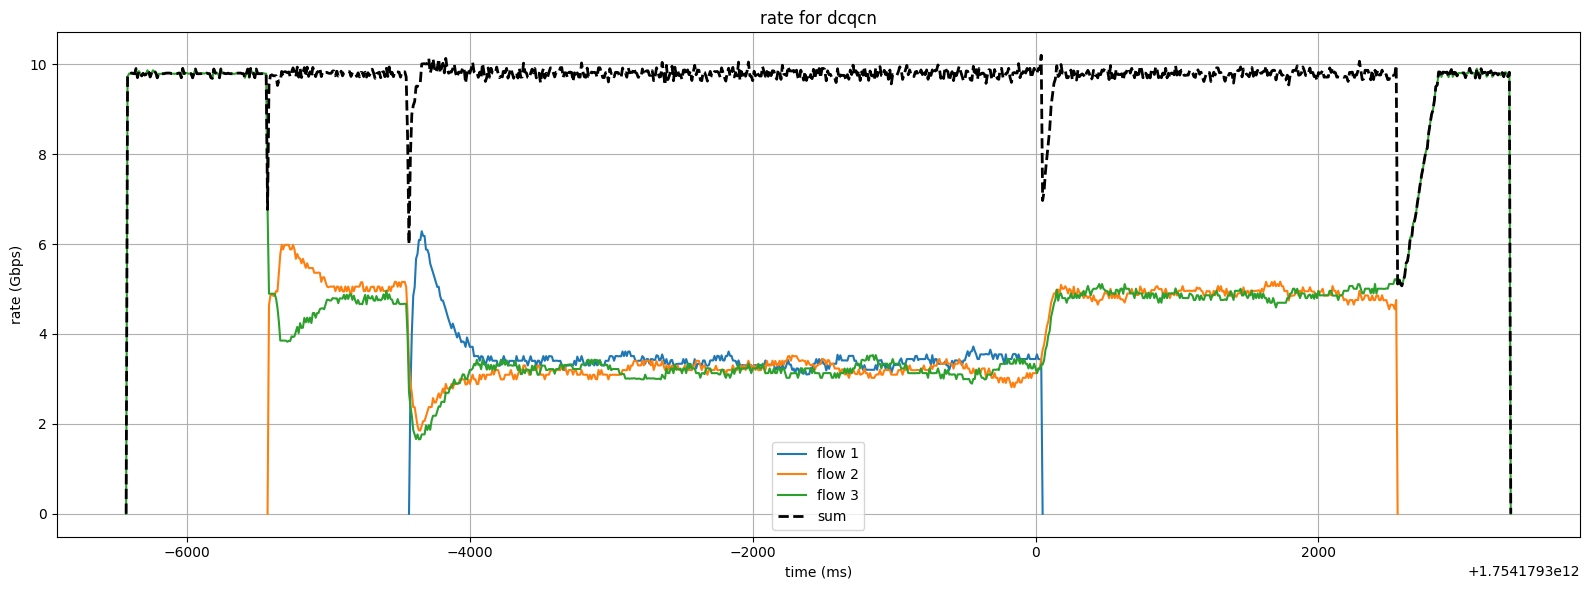

In [48]:
plot_rate_logs([1,2, 3], "dcqcn")

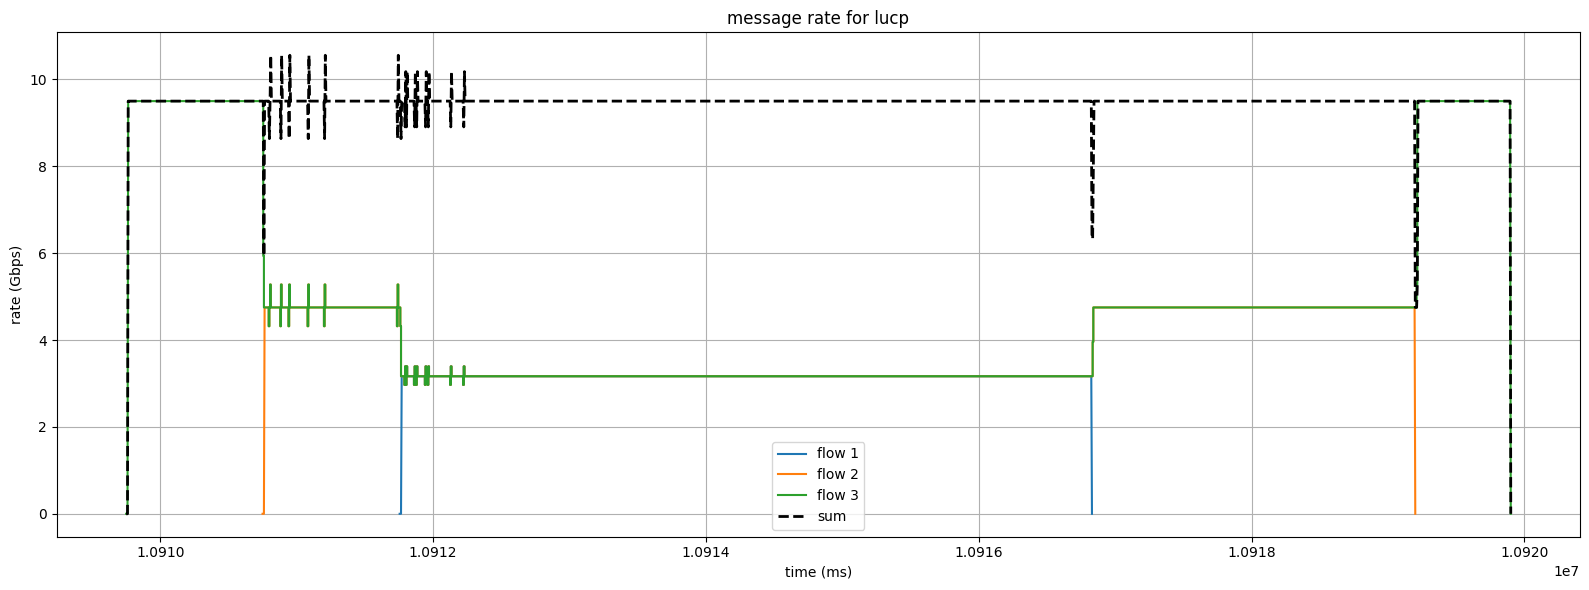

1754179109880
1754179108880
1754179107880


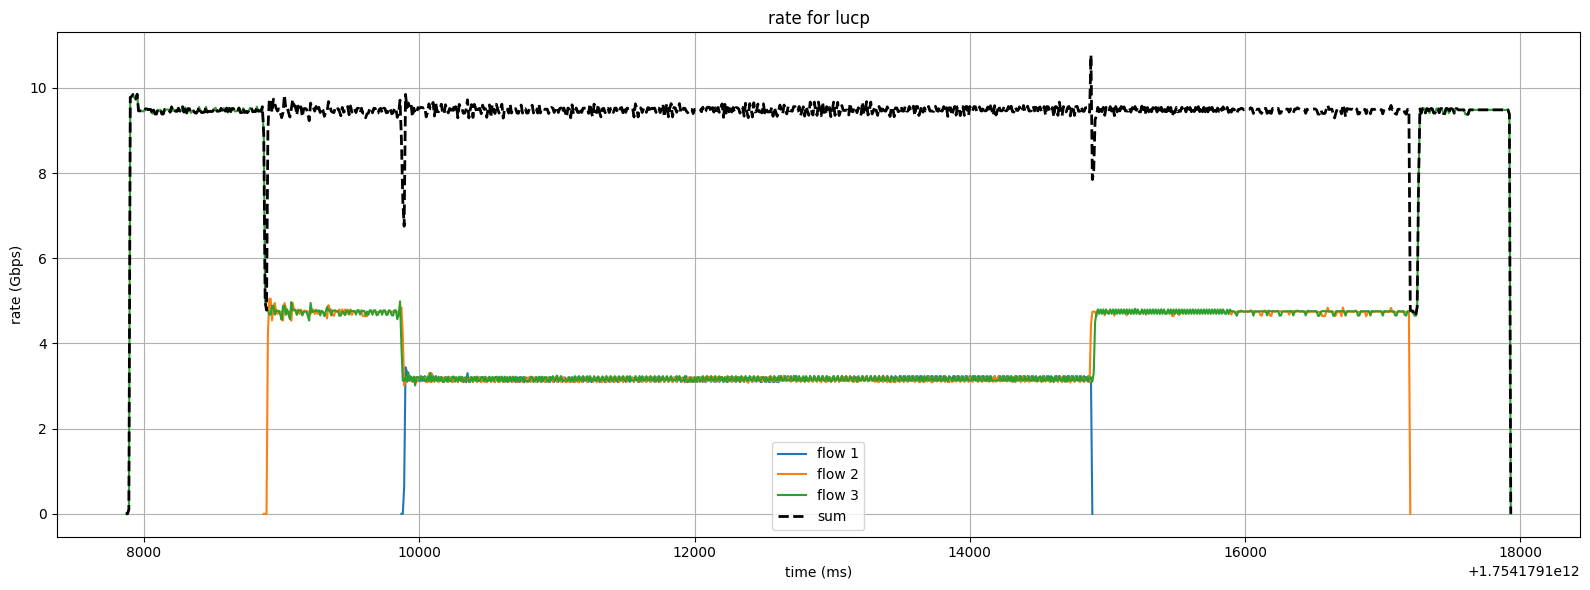

In [45]:
#pure PFC
plot_message_logs([1,2,3], "lucp")
plot_rate_logs([1,2,3],"lucp")

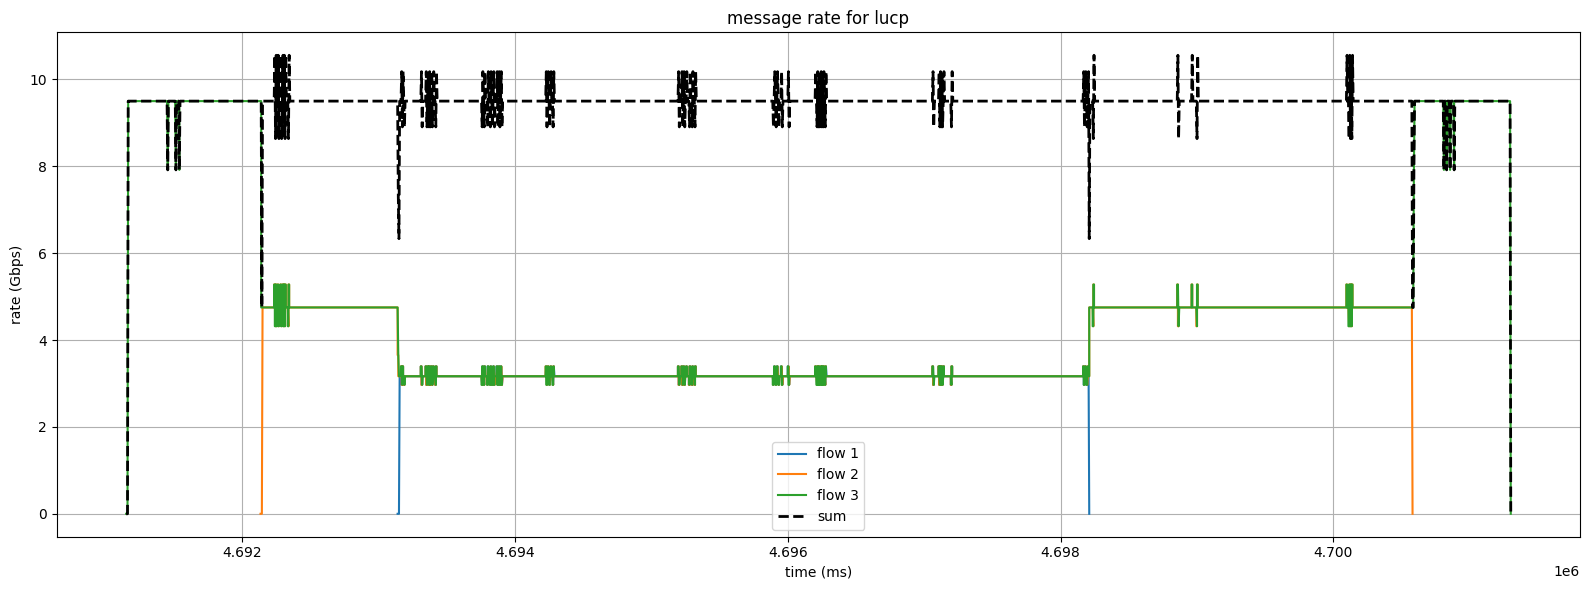

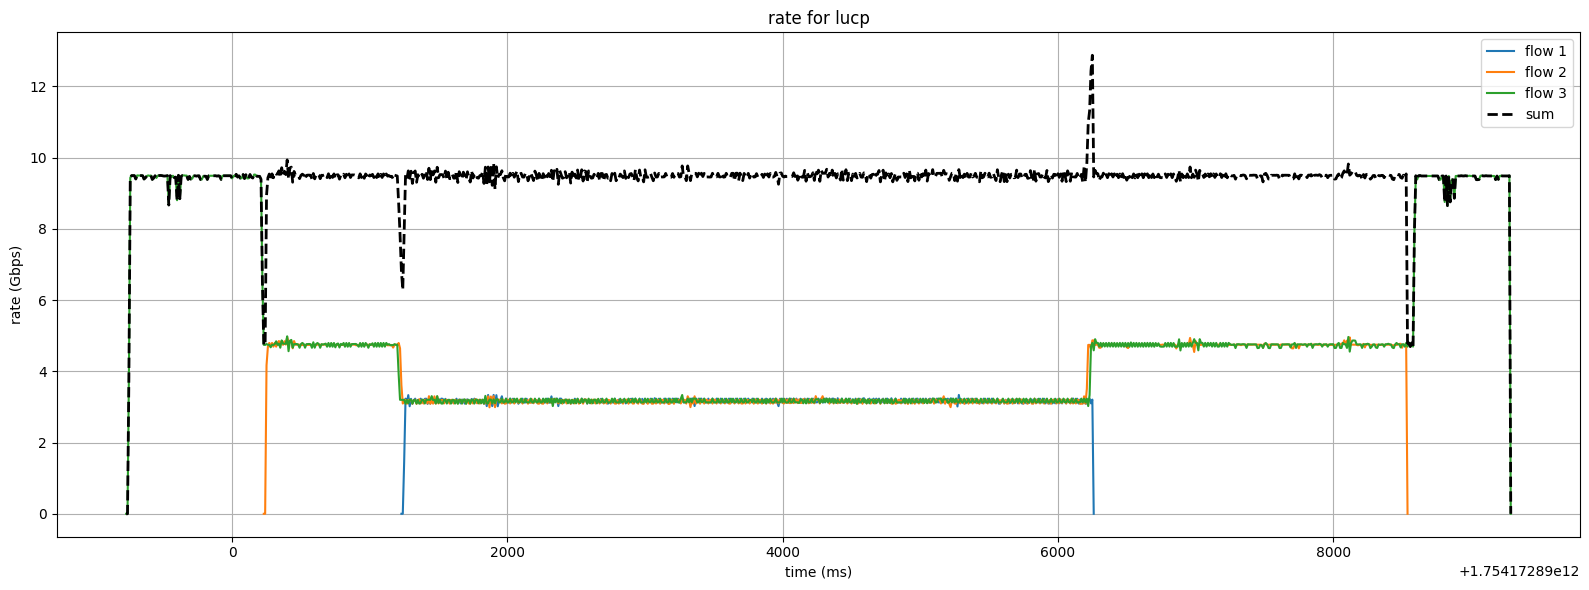

In [25]:
#lucp
plot_message_logs([1,2,3], "lucp")
plot_rate_logs([1,2,3],"lucp")  